# **Cats and Dogs Classification**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files
from IPython.display import Image, display
import os


In [3]:
# Set the path to your dataset inside Google Drive
dataset_path = '/content/drive/MyDrive/dog_cat_dataset'  # adjust if your folder name is different
model_path = '/content/cat_dog_model.h5'  # model will be saved in Colab space


In [4]:
#oad Dataset & Prepare Image Data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)



Found 80 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
# Define and Train CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_generator, epochs=5, validation_data=val_generator, callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5740 - loss: 1.7556 - val_accuracy: 0.5000 - val_loss: 2.1680
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.5125 - loss: 1.6692 - val_accuracy: 0.7000 - val_loss: 0.4924
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.6083 - loss: 0.7215 - val_accuracy: 0.9000 - val_loss: 0.3133
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9133 - loss: 0.3495 - val_accuracy: 0.9000 - val_loss: 0.3363
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 910ms/step - accuracy: 0.9055 - loss: 0.3038 - val_accuracy: 0.9500 - val_loss: 0.2403


In [6]:
# Save the Model
model.save(model_path)
print(f"Model saved at {model_path}")


Model saved at /content/cat_dog_model.h5


Saving dog36.jpg to dog36.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


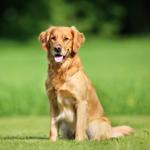

Prediction: Dog


In [14]:
# Upload Image and Predict
uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    model = load_model(model_path)
    prediction = model.predict(img_array)[0][0]

    label = "Cat" if prediction < 0.5 else "Dog"

    display(Image(filename=img_path))
    print("Prediction:", label)
